In [ ]:
pip install quandl

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import quandl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Authenticate quandl api key
quandl_api_key = "eViwZShkZkyo5eGDhQQG"
quandl.ApiConfig.api_key = quandl_api_key
#Zmns8n4ypL4kRmFxnsxC

In [ ]:
# Create dataframe, retrieve US economic data, merge, and rename columns
df = quandl.get('FED/RIFLGFCM06_N_M') # Market yield on U.S. Treasury securities at 6-month constant maturity, quoted on investment basis, Monthly
df.rename(columns = {'Value':'US_treasury_yield'}, inplace = True)

#df = quandl.get('EIA/STEO_FOREX_WORLD_Q') # Nominal U.S. Dollar Index, 2015 Q1=100 (annual and quarterly data only), Quarterly
#df.rename(columns = {'Value':'Nominal_US_Dollar_Index'}, inplace = True)

df = pd.merge(df, quandl.get(['OPEC/ORB']), left_index = True, right_index = True) # OPEC Crude Oil Price
df.rename(columns = {'Value':'crudeoil'}, inplace = True)

df = pd.merge(df, quandl.get('EIA/STEO_GDPQXUS_PCT_Q'), left_index = True, right_index = True) # Real Gross Domestic Product, Quarterly
df.rename(columns = {'Value':'us_gdp_qoq'}, inplace = True)

df = pd.merge(df, quandl.get('EIA/STEO_XRUNR_Q'), left_index = True, right_index = True) # Civilian Unemployment Rate, Quarterly
df.rename(columns = {'Value':'us_unemployment_ra_%'}, inplace = True)

df = pd.merge(df, quandl.get('OECD/KEI_IRLTLT01_USA_ST_Q'), left_index = True, right_index = True) # Long-term interest rate, United States, Level, ratio or index, Quarterly
df.rename(columns = {'Value':'us_longterm_ir_%'}, inplace = True)

df.tail()

,US_treasury_yield,OPEC/ORB - Value,us_gdp_qoq,us_unemployment_ra_%,us_longterm_ir_%
Date,,,,,
2020-06-30,0.18,38.22,-9.032775,13.066667,0.686667
2020-09-30,0.12,40.65,-2.848345,8.800000,0.650000
2020-12-31,0.09,50.24,-2.386694,6.766667,0.863333
2021-03-31,0.05,63.07,0.406168,6.166667,1.316667
2021-06-30,0.05,73.60,13.395853,5.833065,1.593333


In [ ]:
df.isnull().sum()

US_treasury_yield       0
OPEC/ORB - Value        0
us_gdp_qoq              0
us_unemployment_ra_%    0
us_longterm_ir_%        0
dtype: int64

In [ ]:
df

,US_treasury_yield,OPEC/ORB - Value,us_gdp_qoq,us_unemployment_ra_%,us_longterm_ir_%
Date,,,,,
2003-03-31,1.16,27.22,1.770926,5.866667,3.920000
2003-06-30,0.94,27.11,2.028401,6.133333,3.620000
2003-09-30,1.03,26.82,3.301807,6.133333,4.233333
2003-12-31,1.01,29.87,4.326363,5.833333,4.286667
2004-03-31,1.01,31.49,4.304556,5.700000,4.020000
2004-06-30,1.64,32.68,4.203019,5.600000,4.600000
2004-09-30,1.91,43.39,3.431595,5.433333,4.303333
2004-12-31,2.50,36.43,3.281795,5.433333,4.173333
2005-03-31,3.09,50.23,3.870679,5.300000,4.296667


In [ ]:
df

,US_treasury_yield,OPEC/ORB - Value,us_gdp_qoq,us_unemployment_ra_%,us_longterm_ir_%
Date,,,,,
2003-03-31,1.16,27.22,1.770926,5.866667,3.920000
2003-06-30,0.94,27.11,2.028401,6.133333,3.620000
2003-09-30,1.03,26.82,3.301807,6.133333,4.233333
2003-12-31,1.01,29.87,4.326363,5.833333,4.286667
2004-03-31,1.01,31.49,4.304556,5.700000,4.020000
2004-06-30,1.64,32.68,4.203019,5.600000,4.600000
2004-09-30,1.91,43.39,3.431595,5.433333,4.303333
2004-12-31,2.50,36.43,3.281795,5.433333,4.173333
2005-03-31,3.09,50.23,3.870679,5.300000,4.296667


In [ ]:
df_spx = pd.read_csv('/content/SPX.csv')

In [ ]:
df_spx

,Date,spxopen,spxhigh,spxlow,spxclose,spxvolume
0,1994-01-10,469.899994,475.269989,469.549988,475.269989,319490000
1,1994-01-11,475.269989,475.279999,473.269989,474.130005,305490000
2,1994-01-12,474.130005,475.059998,472.140015,474.170013,310690000
3,1994-01-13,474.170013,474.170013,471.799988,472.470001,277970000
4,1994-01-14,472.500000,475.320007,472.500000,474.910004,304920000
...,...,...,...,...,...,...
6902,2021-06-09,4232.990234,4237.089844,4218.740234,4219.549805,3902870000
6903,2021-06-10,4228.560059,4249.740234,4220.339844,4239.180176,3502480000
6904,2021-06-11,4242.899902,4248.379883,4232.250000,4247.439941,3204280000
6905,2021-06-14,4248.310059,4255.589844,4234.069824,4255.149902,3612050000


In [ ]:
df_spx.set_index('Date', drop = True, inplace = True)

In [ ]:
df_spx.index = pd.to_datetime(df_spx.index)

In [ ]:
df_spx

,spxopen,spxhigh,spxlow,spxclose,spxvolume
Date,,,,,
1994-01-10,469.899994,475.269989,469.549988,475.269989,319490000
1994-01-11,475.269989,475.279999,473.269989,474.130005,305490000
1994-01-12,474.130005,475.059998,472.140015,474.170013,310690000
1994-01-13,474.170013,474.170013,471.799988,472.470001,277970000
1994-01-14,472.500000,475.320007,472.500000,474.910004,304920000
...,...,...,...,...,...
2021-06-09,4232.990234,4237.089844,4218.740234,4219.549805,3902870000
2021-06-10,4228.560059,4249.740234,4220.339844,4239.180176,3502480000
2021-06-11,4242.899902,4248.379883,4232.250000,4247.439941,3204280000


In [ ]:
df_spx.columns

Index(['spxopen', 'spxhigh', 'spxlow', 'spxclose', 'spxvolume'], dtype='object')

In [ ]:
df2=pd.merge(df_spx, df, on='Date', how='left').fillna(method='ffill')
df2.dropna(inplace=True)
df2.tail()

,spxopen,spxhigh,spxlow,spxclose,spxvolume,US_treasury_yield,OPEC/ORB - Value,us_gdp_qoq,us_unemployment_ra_%,us_longterm_ir_%
Date,,,,,,,,,,
2021-06-09,4232.990234,4237.089844,4218.740234,4219.549805,3902870000,0.05,63.07,0.406168,6.166667,1.316667
2021-06-10,4228.560059,4249.740234,4220.339844,4239.180176,3502480000,0.05,63.07,0.406168,6.166667,1.316667
2021-06-11,4242.899902,4248.379883,4232.250000,4247.439941,3204280000,0.05,63.07,0.406168,6.166667,1.316667
2021-06-14,4248.310059,4255.589844,4234.069824,4255.149902,3612050000,0.05,63.07,0.406168,6.166667,1.316667
2021-06-15,4255.279785,4257.160156,4238.350098,4246.589844,3578450000,0.05,63.07,0.406168,6.166667,1.316667


In [ ]:
df2.shape

(4585, 10)

In [ ]:
df3=df2.loc['1994-03-31':'2020-02-01']


In [ ]:
df_dependent = df3.drop(columns = ['spxopen', 'spxhigh', 'spxlow', 'spxclose','OPEC/ORB - Value', 'spxvolume'])

In [ ]:
df_dependent.columns

Index(['US_treasury_yield', 'us_gdp_qoq', 'us_unemployment_ra_%',
       'us_longterm_ir_%'],
      dtype='object')

In [ ]:
df3

,spxopen,spxhigh,spxlow,spxclose,spxvolume,US_treasury_yield,OPEC/ORB - Value,us_gdp_qoq,us_unemployment_ra_%,us_longterm_ir_%
Date,,,,,,,,,,
2003-03-31,863.500000,863.500000,843.679993,848.179993,1495500000,1.16,27.22,1.770926,5.866667,3.920000
2003-04-01,848.179993,861.280029,847.849976,858.479980,1461600000,1.16,27.22,1.770926,5.866667,3.920000
2003-04-02,858.479980,884.570007,858.479980,880.900024,1589800000,1.16,27.22,1.770926,5.866667,3.920000
2003-04-03,880.900024,885.890015,876.119995,876.450012,1339500000,1.16,27.22,1.770926,5.866667,3.920000
2003-04-04,876.450012,882.729980,874.229980,878.849976,1241200000,1.16,27.22,1.770926,5.866667,3.920000
...,...,...,...,...,...,...,...,...,...,...
2020-01-27,3247.159912,3258.850098,3234.500000,3243.629883,3823100000,1.58,67.96,2.338885,3.600000,1.793333
2020-01-28,3255.350098,3285.780029,3253.219971,3276.239990,3526720000,1.58,67.96,2.338885,3.600000,1.793333
2020-01-29,3289.459961,3293.469971,3271.889893,3273.399902,3584500000,1.58,67.96,2.338885,3.600000,1.793333


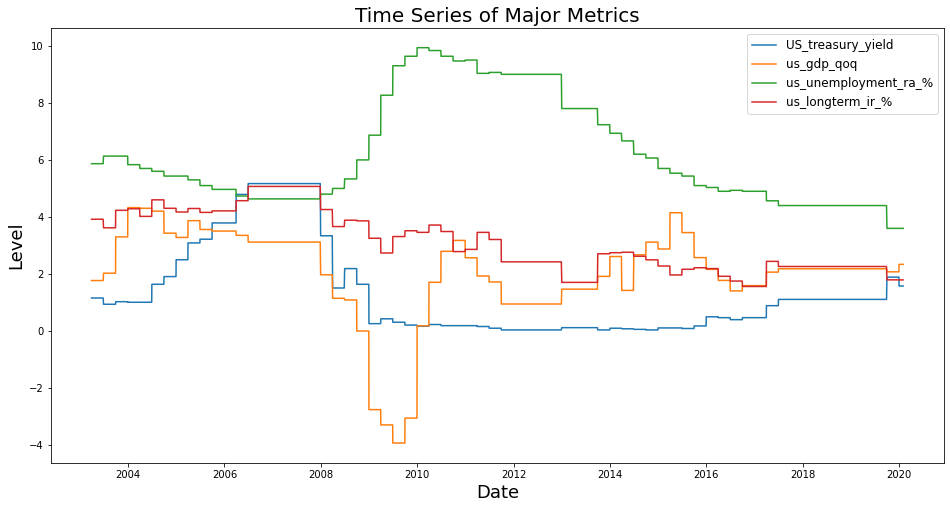

In [ ]:
series = list(df_dependent.columns)
fig, ax = plt.subplots(figsize = (16,8))
for series in series:
    x = df3.index
    y = df3[series]
    ax.plot(x, y, label=series)
ax.legend(fontsize=12)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Level', fontsize=18)
plt.title('Time Series of Major Metrics', fontsize=20)
plt.show()

In [ ]:
df2.to_csv('SPXfundamental.csv')
